<a href="https://colab.research.google.com/github/Antonyraj007/Antony-/blob/main/structure_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_parquet('/content/train (2).parquet')
df.to_csv('train.csv')

In [ ]:
import pandas as pd
df = pd.read_parquet('/content/test (2).parquet')
df.to_csv('test.csv')

In [ ]:
train=pd.read_csv('train.csv')

In [ ]:
test=pd.read_csv('test.csv')

In [ ]:
test.shape

(1065524, 4)

In [ ]:
train.shape

(3220868, 4)

In [ ]:
train.head()

,Unnamed: 0,Patient-Uid,Date,Incident
0,0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
2,3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
3,4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
4,8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


In [ ]:
test.head()

,Unnamed: 0,Patient-Uid,Date,Incident
0,0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,SYMPTOM_TYPE_0
1,1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-10-17,DRUG_TYPE_0
2,2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,DRUG_TYPE_2
3,3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-12-05,DRUG_TYPE_1
4,4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-11-04,SYMPTOM_TYPE_0


In [ ]:
train.describe()

,Unnamed: 0
count,3.220868e+06
mean,8.145649e+06
std,9.489842e+06
min,0.000000e+00
25%,1.179531e+06
50%,2.451750e+06
75%,1.860377e+07
max,2.908091e+07


In [ ]:
test.isnull().sum()

Unnamed: 0     0
Patient-Uid    0
Date           0
Incident       0
dtype: int64

In [ ]:
train.isnull().sum()

Unnamed: 0     0
Patient-Uid    0
Date           0
Incident       0
dtype: int64

In [ ]:
train.dtypes

Unnamed: 0      int64
Patient-Uid    object
Date           object
Incident       object
dtype: object

In [ ]:
test.dtypes

Unnamed: 0      int64
Patient-Uid    object
Date           object
Incident       object
dtype: object

In [ ]:
train['Date']=pd.to_datetime(train['Date'])

In [ ]:
test['Date']=pd.to_datetime(test['Date'])

In [ ]:
train.dtypes

Unnamed: 0              int64
Patient-Uid            object
Date           datetime64[ns]
Incident               object
dtype: object

In [ ]:
test.dtypes

Unnamed: 0              int64
Patient-Uid            object
Date           datetime64[ns]
Incident               object
dtype: object

In [ ]:
test['Date']=pd.to_datetime(test['Date'])

In [ ]:
test.dtypes

Unnamed: 0              int64
Patient-Uid            object
Date           datetime64[ns]
Incident               object
dtype: object

In [ ]:
train=train.drop(['Unnamed: 0'],axis=1)

In [ ]:
test=test.drop(['Unnamed: 0'],axis=1)

In [ ]:
test.head()

,Patient-Uid,Date,Incident
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,SYMPTOM_TYPE_0
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-10-17,DRUG_TYPE_0
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,DRUG_TYPE_2
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-12-05,DRUG_TYPE_1
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-11-04,SYMPTOM_TYPE_0


In [ ]:
import pandas as pd

train['Date'] = pd.to_datetime(train['Date'])
train = train.sort_values(['Patient-Uid', 'Date'])
train['Interval'] = train.groupby('Patient-Uid')['Date'].diff()
train['Interval'] = train['Interval'].dt.days
train['Interval'] = train.groupby('Patient-Uid')['Interval'].ffill()
print(train)


                                  Patient-Uid       Date        Incident  \
956739   a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2015-09-22     DRUG_TYPE_7   
804777   a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2018-04-13  SYMPTOM_TYPE_2   
757673   a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2018-05-02     DRUG_TYPE_7   
121904   a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2018-11-23  SYMPTOM_TYPE_0   
304144   a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2018-11-23     DRUG_TYPE_9   
...                                       ...        ...             ...   
3117129  a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-06-19     DRUG_TYPE_6   
3195685  a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-07-09     TARGET DRUG   
2539655  a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-07-10     DRUG_TYPE_1   
2236741  a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-08-05     TARGET DRUG   
2936906  a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-08-08     DRUG_TYPE_5   

         Interval  
956739        NaN  
804777      934.0  
757673       19.0  
121904 

In [ ]:
import pandas as pd

test['Date'] = pd.to_datetime(test['Date'])
test = test.sort_values(['Patient-Uid', 'Date'])
test['Interval'] = test.groupby('Patient-Uid')['Date'].diff()
test['Interval'] = test['Interval'].dt.days
test['Interval'] = test.groupby('Patient-Uid')['Interval'].ffill()
print(test)


                                  Patient-Uid       Date           Incident  \
9        a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f 2016-06-23        DRUG_TYPE_7   
0        a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f 2016-12-08     SYMPTOM_TYPE_0   
7        a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f 2016-12-08        TEST_TYPE_0   
11       a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f 2016-12-08        DRUG_TYPE_0   
20       a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f 2016-12-08  PRIMARY_DIAGNOSIS   
...                                       ...        ...                ...   
1065362  a10272c9-1c7c-11ec-b3ce-16262ee38c7f 2019-03-06       DRUG_TYPE_13   
1065397  a10272c9-1c7c-11ec-b3ce-16262ee38c7f 2019-03-06        DRUG_TYPE_0   
1065418  a10272c9-1c7c-11ec-b3ce-16262ee38c7f 2019-03-06        DRUG_TYPE_8   
1065450  a10272c9-1c7c-11ec-b3ce-16262ee38c7f 2019-03-06        DRUG_TYPE_2   
1065467  a10272c9-1c7c-11ec-b3ce-16262ee38c7f 2019-03-06        DRUG_TYPE_8   

         Interval  
9             NaN  
0          

In [ ]:
train = train.sort_values(['Patient-Uid', 'Date'])

In [ ]:
train.head()

,Patient-Uid,Date,Incident,Interval
956739,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2015-09-22,DRUG_TYPE_7,NaN
804777,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-04-13,SYMPTOM_TYPE_2,934.0
757673,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-05-02,DRUG_TYPE_7,19.0
121904,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,SYMPTOM_TYPE_0,205.0
304144,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,DRUG_TYPE_9,0.0


In [ ]:
test = test.sort_values(['Patient-Uid', 'Date'])

In [ ]:
train.sort_values(by=['Incident','Date'])

,Patient-Uid,Date,Incident,Interval
317478,a0dcc351-1c7c-11ec-b94f-16262ee38c7f,2015-04-07,DRUG_TYPE_0,0.0
169068,a0dd3b8e-1c7c-11ec-bb5c-16262ee38c7f,2015-04-07,DRUG_TYPE_0,NaN
1603520,a0dd722d-1c7c-11ec-8f95-16262ee38c7f,2015-04-07,DRUG_TYPE_0,NaN
1751417,a0de0c54-1c7c-11ec-9121-16262ee38c7f,2015-04-07,DRUG_TYPE_0,NaN
1524370,a0de77a0-1c7c-11ec-9286-16262ee38c7f,2015-04-07,DRUG_TYPE_0,NaN
...,...,...,...,...
2169826,a0eaa1af-1c7c-11ec-87a3-16262ee38c7f,2020-06-11,TEST_TYPE_5,23.0
2344917,a0ea36d4-1c7c-11ec-90c3-16262ee38c7f,2020-07-03,TEST_TYPE_5,0.0
2113337,a0ef6f24-1c7c-11ec-a031-16262ee38c7f,2020-07-16,TEST_TYPE_5,0.0
2140056,a0eb2724-1c7c-11ec-9ffe-16262ee38c7f,2020-07-17,TEST_TYPE_5,0.0


In [ ]:
test.sort_values(by=['Incident','Date'])

,Patient-Uid,Date,Incident,Interval
92204,a0fa9503-1c7c-11ec-b1f9-16262ee38c7f,2015-04-07,DRUG_TYPE_0,0.0
125037,a0facfb2-1c7c-11ec-9444-16262ee38c7f,2015-04-07,DRUG_TYPE_0,NaN
134169,a0fadff0-1c7c-11ec-a0f2-16262ee38c7f,2015-04-07,DRUG_TYPE_0,0.0
156687,a0fb0b52-1c7c-11ec-b4ad-16262ee38c7f,2015-04-07,DRUG_TYPE_0,NaN
186602,a0fb46ec-1c7c-11ec-a9d1-16262ee38c7f,2015-04-07,DRUG_TYPE_0,0.0
...,...,...,...,...
933769,a1015a50-1c7c-11ec-8afd-16262ee38c7f,2018-07-21,TEST_TYPE_5,0.0
200554,a0fb6390-1c7c-11ec-9da1-16262ee38c7f,2018-09-01,TEST_TYPE_5,0.0
986632,a101bf28-1c7c-11ec-8c57-16262ee38c7f,2019-10-24,TEST_TYPE_5,0.0
960071,a1018d58-1c7c-11ec-a6e0-16262ee38c7f,2019-12-25,TEST_TYPE_5,0.0


In [ ]:
train['Incident'].values

array(['DRUG_TYPE_7', 'SYMPTOM_TYPE_2', 'DRUG_TYPE_7', ..., 'DRUG_TYPE_1',
       'TARGET DRUG', 'DRUG_TYPE_5'], dtype=object)

In [ ]:
test['Incident'].values

array(['DRUG_TYPE_7', 'SYMPTOM_TYPE_0', 'TEST_TYPE_0', ..., 'DRUG_TYPE_8',
       'DRUG_TYPE_2', 'DRUG_TYPE_8'], dtype=object)

In [ ]:
train.head()

,Patient-Uid,Date,Incident,Interval
956739,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2015-09-22,DRUG_TYPE_7,NaN
804777,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-04-13,SYMPTOM_TYPE_2,934.0
757673,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-05-02,DRUG_TYPE_7,19.0
121904,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,SYMPTOM_TYPE_0,205.0
304144,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,DRUG_TYPE_9,0.0


In [ ]:
train.head()

,Patient-Uid,Date,Incident,Interval
956739,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2015-09-22,DRUG_TYPE_7,NaN
804777,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-04-13,SYMPTOM_TYPE_2,934.0
757673,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-05-02,DRUG_TYPE_7,19.0
121904,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,SYMPTOM_TYPE_0,205.0
304144,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,DRUG_TYPE_9,0.0


In [ ]:
import numpy as np

train['Target'] = np.where(train['Incident'] == 'TARGET DRUG', 1, 0)

print(train)


                                  Patient-Uid       Date        Incident  \
956739   a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2015-09-22     DRUG_TYPE_7   
804777   a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2018-04-13  SYMPTOM_TYPE_2   
757673   a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2018-05-02     DRUG_TYPE_7   
121904   a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2018-11-23  SYMPTOM_TYPE_0   
304144   a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2018-11-23     DRUG_TYPE_9   
...                                       ...        ...             ...   
3117129  a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-06-19     DRUG_TYPE_6   
3195685  a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-07-09     TARGET DRUG   
2539655  a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-07-10     DRUG_TYPE_1   
2236741  a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-08-05     TARGET DRUG   
2936906  a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-08-08     DRUG_TYPE_5   

         Interval  Target  
956739        NaN       0  
804777      934.0       0  
757

In [ ]:
train.head(100)

,Patient-Uid,Date,Incident,Interval,Target
956739,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2015-09-22,DRUG_TYPE_7,NaN,0
804777,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-04-13,SYMPTOM_TYPE_2,934.0,0
757673,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-05-02,DRUG_TYPE_7,19.0,0
121904,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,SYMPTOM_TYPE_0,205.0,0
304144,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,DRUG_TYPE_9,0.0,0
...,...,...,...,...,...
1754691,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-09,DRUG_TYPE_2,2.0,0
1407379,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-04-10,DRUG_TYPE_0,NaN,0
1124222,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-04-12,DRUG_TYPE_2,2.0,0
1605996,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-04-12,DRUG_TYPE_0,0.0,0


In [ ]:
import numpy as np

test['Target'] = np.where(test['Incident'] == 'TARGET DRUG', 1, 0)

print(test)


                                  Patient-Uid       Date           Incident  \
9        a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f 2016-06-23        DRUG_TYPE_7   
0        a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f 2016-12-08     SYMPTOM_TYPE_0   
7        a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f 2016-12-08        TEST_TYPE_0   
11       a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f 2016-12-08        DRUG_TYPE_0   
20       a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f 2016-12-08  PRIMARY_DIAGNOSIS   
...                                       ...        ...                ...   
1065362  a10272c9-1c7c-11ec-b3ce-16262ee38c7f 2019-03-06       DRUG_TYPE_13   
1065397  a10272c9-1c7c-11ec-b3ce-16262ee38c7f 2019-03-06        DRUG_TYPE_0   
1065418  a10272c9-1c7c-11ec-b3ce-16262ee38c7f 2019-03-06        DRUG_TYPE_8   
1065450  a10272c9-1c7c-11ec-b3ce-16262ee38c7f 2019-03-06        DRUG_TYPE_2   
1065467  a10272c9-1c7c-11ec-b3ce-16262ee38c7f 2019-03-06        DRUG_TYPE_8   

         Interval  Target  
9             NaN      

In [ ]:
train=train.dropna()

In [ ]:
test=test.dropna()

In [ ]:
train.head()

,Patient-Uid,Date,Incident,Interval,Target
804777,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-04-13,SYMPTOM_TYPE_2,934.0,0
757673,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-05-02,DRUG_TYPE_7,19.0,0
121904,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,SYMPTOM_TYPE_0,205.0,0
304144,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,DRUG_TYPE_9,0.0,0
408903,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,DRUG_TYPE_0,0.0,0


In [ ]:
train['Target'].value_counts()

0    3126617
1      67218
Name: Target, dtype: int64

In [ ]:
train.head()

,Patient-Uid,Date,Incident,Interval,Target
804777,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-04-13,SYMPTOM_TYPE_2,934.0,0
757673,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-05-02,DRUG_TYPE_7,19.0,0
121904,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,SYMPTOM_TYPE_0,205.0,0
304144,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,DRUG_TYPE_9,0.0,0
408903,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,DRUG_TYPE_0,0.0,0


In [ ]:
test.head()

,Patient-Uid,Date,Incident,Interval,Target
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,SYMPTOM_TYPE_0,168.0,0
7,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,TEST_TYPE_0,0.0,0
11,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,DRUG_TYPE_0,0.0,0
20,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,PRIMARY_DIAGNOSIS,0.0,0
29,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,DRUG_TYPE_11,0.0,0


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

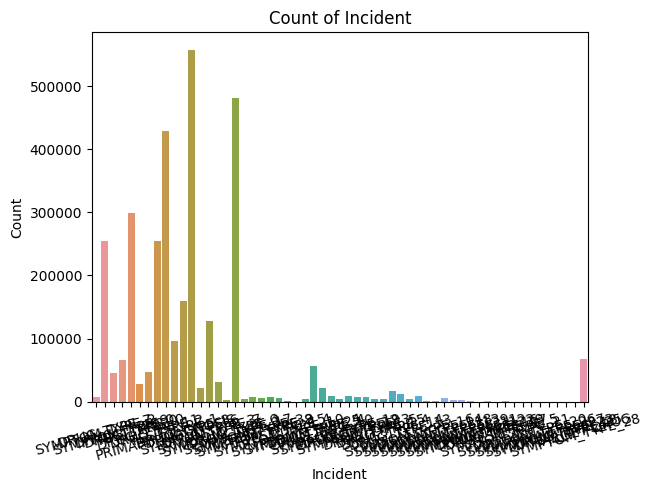

In [ ]:
sns.countplot(x=train['Incident'],data=train)
plt.title('Count of Incident')
plt.xlabel('Incident')
plt.ylabel('Count')

plt.xticks(rotation=15)
plt.show()

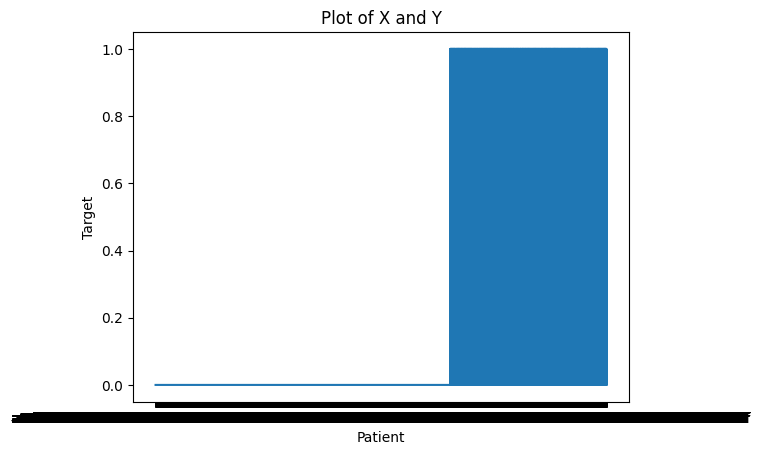

In [ ]:
plt.plot(train['Patient-Uid'], train['Target'])

# Set plot title and axis labels
plt.title('Plot of X and Y')
plt.xlabel('Patient')
plt.ylabel('Target')

# Show the plot
plt.show()







In [ ]:
train.sort_values(by=['Incident','Patient-Uid'])

,Patient-Uid,Date,Incident,Interval,Target
408903,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,DRUG_TYPE_0,0.0,0
720824,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-24,DRUG_TYPE_0,0.0,0
384600,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-12-02,DRUG_TYPE_0,8.0,0
975262,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-01-30,DRUG_TYPE_0,0.0,0
409442,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-02-03,DRUG_TYPE_0,0.0,0
...,...,...,...,...,...
2142797,a0efe42c-1c7c-11ec-8060-16262ee38c7f,2018-12-21,TEST_TYPE_5,26.0,0
2244826,a0efedce-1c7c-11ec-b747-16262ee38c7f,2019-01-26,TEST_TYPE_5,4.0,0
2160779,a0f00dec-1c7c-11ec-baba-16262ee38c7f,2018-05-26,TEST_TYPE_5,0.0,0
2190081,a0f05106-1c7c-11ec-b076-16262ee38c7f,2016-07-05,TEST_TYPE_5,0.0,0


In [ ]:
train.sort_values(by=['Target','Patient-Uid'])

,Patient-Uid,Date,Incident,Interval,Target
804777,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-04-13,SYMPTOM_TYPE_2,934.0,0
757673,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-05-02,DRUG_TYPE_7,19.0,0
121904,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,SYMPTOM_TYPE_0,205.0,0
304144,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,DRUG_TYPE_9,0.0,0
408903,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,DRUG_TYPE_0,0.0,0
...,...,...,...,...,...
2437992,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2020-08-11,TARGET DRUG,44.0,1
2908071,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,2020-07-21,TARGET DRUG,0.0,1
2581996,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-18,TARGET DRUG,13.0,1
3195685,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-09,TARGET DRUG,20.0,1


In [ ]:
gkk = train.groupby(['Target', 'Patient-Uid'])

gkk.first()

Date           Incident  \
Target Patient-Uid                                                          
0      a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2018-04-13     SYMPTOM_TYPE_2   
       a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f 2015-04-12        DRUG_TYPE_2   
       a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f 2015-04-08  PRIMARY_DIAGNOSIS   
       a0dc950b-1c7c-11ec-b6ec-16262ee38c7f 2015-04-22        DRUG_TYPE_7   
       a0dc9543-1c7c-11ec-bb63-16262ee38c7f 2015-04-24        TEST_TYPE_1   
...                                                ...                ...   
1      a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f 2020-06-16        TARGET DRUG   
       a0f0d4f4-1c7c-11ec-b144-16262ee38c7f 2020-07-18        TARGET DRUG   
       a0f0d523-1c7c-11ec-89d2-16262ee38c7f 2020-05-21        TARGET DRUG   
       a0f0d553-1c7c-11ec-a70a-16262ee38c7f 2020-07-21        TARGET DRUG   
       a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-06-18        TARGET DRUG   

                                             Interval  
Target Patient-Uid                                     
0      a0db1e73-1c7c-11ec-ae39-16262ee38c7f     934.0  
       a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f       2.0  
       a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f       0.0  
       a0dc950b-1c7c-11ec-b6ec-16262ee38c7f       0.0  
       a0dc9543-1c7c-11ec-bb63-16262ee38c7f      10.0  
...                                               ...  
1      a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f       3.0  
       a0f0d4f4-1c7c-11ec-b144-16262ee38c7f       0.0  
       a0f0d523-1c7c-11ec-89d2-16262ee38c7f       0.0  
       a0f0d553-1c7c-11ec-a70a-16262ee38c7f       0.0  
       a0f0d582-1c7c-11ec-a6c1-16262ee38c7f      13.0  

[36407 rows x 3 columns]

In [ ]:
encoded_df = pd.get_dummies(train['Incident'])

# Concatenate the encoded DataFrame with the original DataFrame
df_encoded = pd.concat([train, encoded_df], axis=1)

print(df_encoded)

                                  Patient-Uid       Date        Incident  \
804777   a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2018-04-13  SYMPTOM_TYPE_2   
757673   a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2018-05-02     DRUG_TYPE_7   
121904   a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2018-11-23  SYMPTOM_TYPE_0   
304144   a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2018-11-23     DRUG_TYPE_9   
408903   a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2018-11-23     DRUG_TYPE_0   
...                                       ...        ...             ...   
3117129  a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-06-19     DRUG_TYPE_6   
3195685  a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-07-09     TARGET DRUG   
2539655  a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-07-10     DRUG_TYPE_1   
2236741  a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-08-05     TARGET DRUG   
2936906  a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-08-08     DRUG_TYPE_5   

         Interval  Target  DRUG_TYPE_0  DRUG_TYPE_1  DRUG_TYPE_10  \
804777      934.0 

In [ ]:
df_encoded

,Patient-Uid,Date,Incident,Interval,Target,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,...,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TARGET DRUG,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5
804777,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-04-13,SYMPTOM_TYPE_2,934.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
757673,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-05-02,DRUG_TYPE_7,19.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121904,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,SYMPTOM_TYPE_0,205.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
304144,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,DRUG_TYPE_9,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
408903,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,DRUG_TYPE_0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117129,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-19,DRUG_TYPE_6,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3195685,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-09,TARGET DRUG,20.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2539655,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-10,DRUG_TYPE_1,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2236741,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-08-05,TARGET DRUG,26.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_encoded.drop('Patient-Uid', axis=1, inplace=True)

In [ ]:
df_encoded

,Date,Incident,Interval,Target,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,...,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TARGET DRUG,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5
804777,2018-04-13,SYMPTOM_TYPE_2,934.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
757673,2018-05-02,DRUG_TYPE_7,19.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121904,2018-11-23,SYMPTOM_TYPE_0,205.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
304144,2018-11-23,DRUG_TYPE_9,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
408903,2018-11-23,DRUG_TYPE_0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117129,2020-06-19,DRUG_TYPE_6,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3195685,2020-07-09,TARGET DRUG,20.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2539655,2020-07-10,DRUG_TYPE_1,1.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2236741,2020-08-05,TARGET DRUG,26.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_encoded.drop(['Interval'],axis=1)

,Date,Incident,Target,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,...,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TARGET DRUG,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5
804777,2018-04-13,SYMPTOM_TYPE_2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
757673,2018-05-02,DRUG_TYPE_7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121904,2018-11-23,SYMPTOM_TYPE_0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
304144,2018-11-23,DRUG_TYPE_9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
408903,2018-11-23,DRUG_TYPE_0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117129,2020-06-19,DRUG_TYPE_6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3195685,2020-07-09,TARGET DRUG,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2539655,2020-07-10,DRUG_TYPE_1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2236741,2020-08-05,TARGET DRUG,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_encoded.drop(['Incident'],axis=1)

,Date,Interval,Target,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,...,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TARGET DRUG,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5
804777,2018-04-13,934.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
757673,2018-05-02,19.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121904,2018-11-23,205.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
304144,2018-11-23,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
408903,2018-11-23,0.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117129,2020-06-19,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3195685,2020-07-09,20.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2539655,2020-07-10,1.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2236741,2020-08-05,26.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_encoded.drop(["Interval"],axis=1)

,Date,Incident,Target,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,...,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TARGET DRUG,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5
804777,2018-04-13,SYMPTOM_TYPE_2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
757673,2018-05-02,DRUG_TYPE_7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121904,2018-11-23,SYMPTOM_TYPE_0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
304144,2018-11-23,DRUG_TYPE_9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
408903,2018-11-23,DRUG_TYPE_0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117129,2020-06-19,DRUG_TYPE_6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3195685,2020-07-09,TARGET DRUG,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2539655,2020-07-10,DRUG_TYPE_1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2236741,2020-08-05,TARGET DRUG,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df=df_encoded.drop(['Interval'],axis=1)

In [ ]:
df=df.drop(['Incident'],axis=1)

In [ ]:
df=df.drop(['Date'],axis=1)

In [ ]:
train

,Patient-Uid,Date,Incident,Interval,Target
804777,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-04-13,SYMPTOM_TYPE_2,934.0,0
757673,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-05-02,DRUG_TYPE_7,19.0,0
121904,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,SYMPTOM_TYPE_0,205.0,0
304144,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,DRUG_TYPE_9,0.0,0
408903,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,DRUG_TYPE_0,0.0,0
...,...,...,...,...,...
3117129,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-19,DRUG_TYPE_6,1.0,0
3195685,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-09,TARGET DRUG,20.0,1
2539655,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-10,DRUG_TYPE_1,1.0,0
2236741,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-08-05,TARGET DRUG,26.0,1


In [ ]:
df

,Target,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,...,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TARGET DRUG,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5
804777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
757673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
304144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
408903,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3195685,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2539655,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2236741,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
X=df[[i for i in df.columns if i!="Target"]]
y=df["Target"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape

(2555068, 57)

In [ ]:
y_train.shape

(2555068,)

In [ ]:
X_test.shape

(638767, 57)

In [ ]:
y_test.shape

(638767,)

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote=SMOTE()
X_smote,y_smote=smote.fit_resample(X_train,y_train)
y_smote.value_counts()

0    2501352
1    2501352
Name: Target, dtype: int64

In [ ]:
X_train=X_smote.copy()
y_train=y_smote.copy()


In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression
log_regression=LogisticRegression()
log_regression.fit(X_train,y_train)



LogisticRegression()

In [ ]:
y_pred_log=log_regression.predict(X_test)

In [ ]:
log_regression.score(X_train,y_train)

1.0

In [ ]:
log_regression.score(X_test,y_test)

1.0

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    625265
           1       1.00      1.00      1.00     13502

    accuracy                           1.00    638767
   macro avg       1.00      1.00      1.00    638767
weighted avg       1.00      1.00      1.00    638767



In [ ]:
from sklearn.metrics import precision_score,f1_score,recall_score

In [ ]:
precision_score(y_test,y_pred_log,average='weighted')

1.0

In [ ]:
recall_score(y_test,y_pred_log,average='weighted')

1.0

In [ ]:
f1_score(y_test,y_pred_log,average='weighted')

1.0